# Create bathymetry for regional MITgcm based on etopo-2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xmitgcm as xm

In [2]:
# open etopo2 dataset
ds=xr.open_dataset('etopo2.nc')
# roll longitude coordinate
ds['lon']=ds['lon']+180
topo = ds.topo.roll(lon=int(10800/2))

In [3]:
# define new grid
runcase = 'NorthPacific.lonlat2x2.42lev'
toponame = 'NorthPacific.etopo2'
xrange = [131, 249]  # zonal extent
yrange = [-16, 62]  # meridional extent
n = [60, 40]   # number of grid points
# output file name
fn = 'bathymetry_'+toponame+'.bin'

In [4]:
#define a new grid coordinates
xn = np.linspace(xrange[0], xrange[1], n[0])
yn = np.linspace(yrange[0], yrange[1], n[1])
zn=np.array([-5.0000e+00, -1.5500e+01, -2.7000e+01, -3.9500e+01, -5.3000e+01,
       -6.8000e+01, -8.5000e+01, -1.0400e+02, -1.2550e+02, -1.5000e+02,
       -1.7750e+02, -2.0850e+02, -2.4350e+02, -2.8300e+02, -3.2800e+02,
       -3.7950e+02, -4.3850e+02, -5.0600e+02, -5.8300e+02, -6.7100e+02,
       -7.7200e+02, -8.8800e+02, -1.0210e+03, -1.1735e+03, -1.3485e+03,
       -1.5495e+03, -1.7805e+03, -2.0460e+03, -2.3190e+03, -2.5750e+03,
       -2.8250e+03, -3.0750e+03, -3.3250e+03, -3.5750e+03, -3.8250e+03,
       -4.0750e+03, -4.3250e+03, -4.5750e+03, -4.8250e+03, -5.0750e+03,
       -5.3250e+03, -5.5750e+03], dtype=float) * -1
#
# print the values of x0 and y0
x0 = xn[0]-(xn[1]-xn[0])/2.
y0 = yn[0]-(yn[1]-yn[0])/2.
print('x0='+str(x0))
print('y0='+str(y0))
#
# print the number of grid points in x, y and z
print('Nx='+str(xn.size))
print('Ny='+str(yn.size))
print('Nz='+str(zn.size))

x0=130.0
y0=-17.0
Nx=60
Ny=40
Nz=42


In [5]:
# Set land values to zero
topo1 = topo.where(topo<0,0)

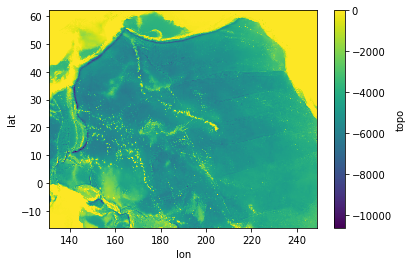

In [10]:
# plot original topography
topo1.sel(lon=slice(xrange[0],xrange[1])).sel(lat=slice(yrange[0],yrange[1])).plot()

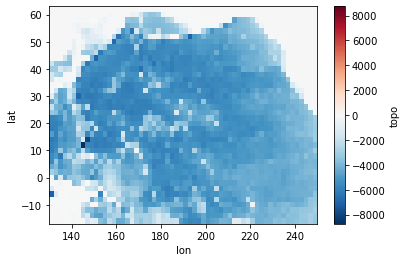

In [11]:
# interpolate onto new grid
topo2 = topo1.interp(lon=xn,lat=yn,method='linear')
topo2.plot()

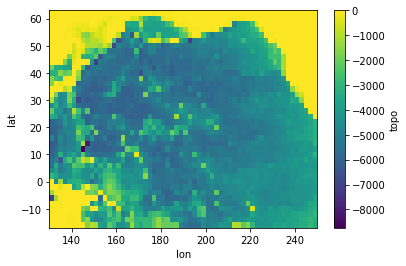

In [12]:
# interpolate onto new grid
topo3 = topo1.interp(lon=xn,lat=yn,method='nearest')
topo3.plot()

Text(0.5, 1.0, 'nearest - linear')

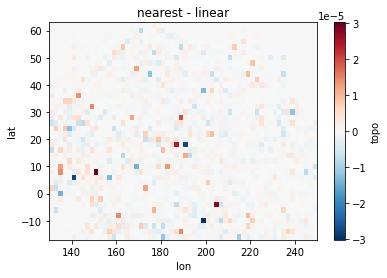

In [13]:
diff=topo3 - topo2
diff.plot()
plt.title('nearest - linear')

In [14]:
# output data as binary file using xmitgcm
data=topo3.to_numpy()
xm.utils.write_to_binary(data.flatten(), fn)